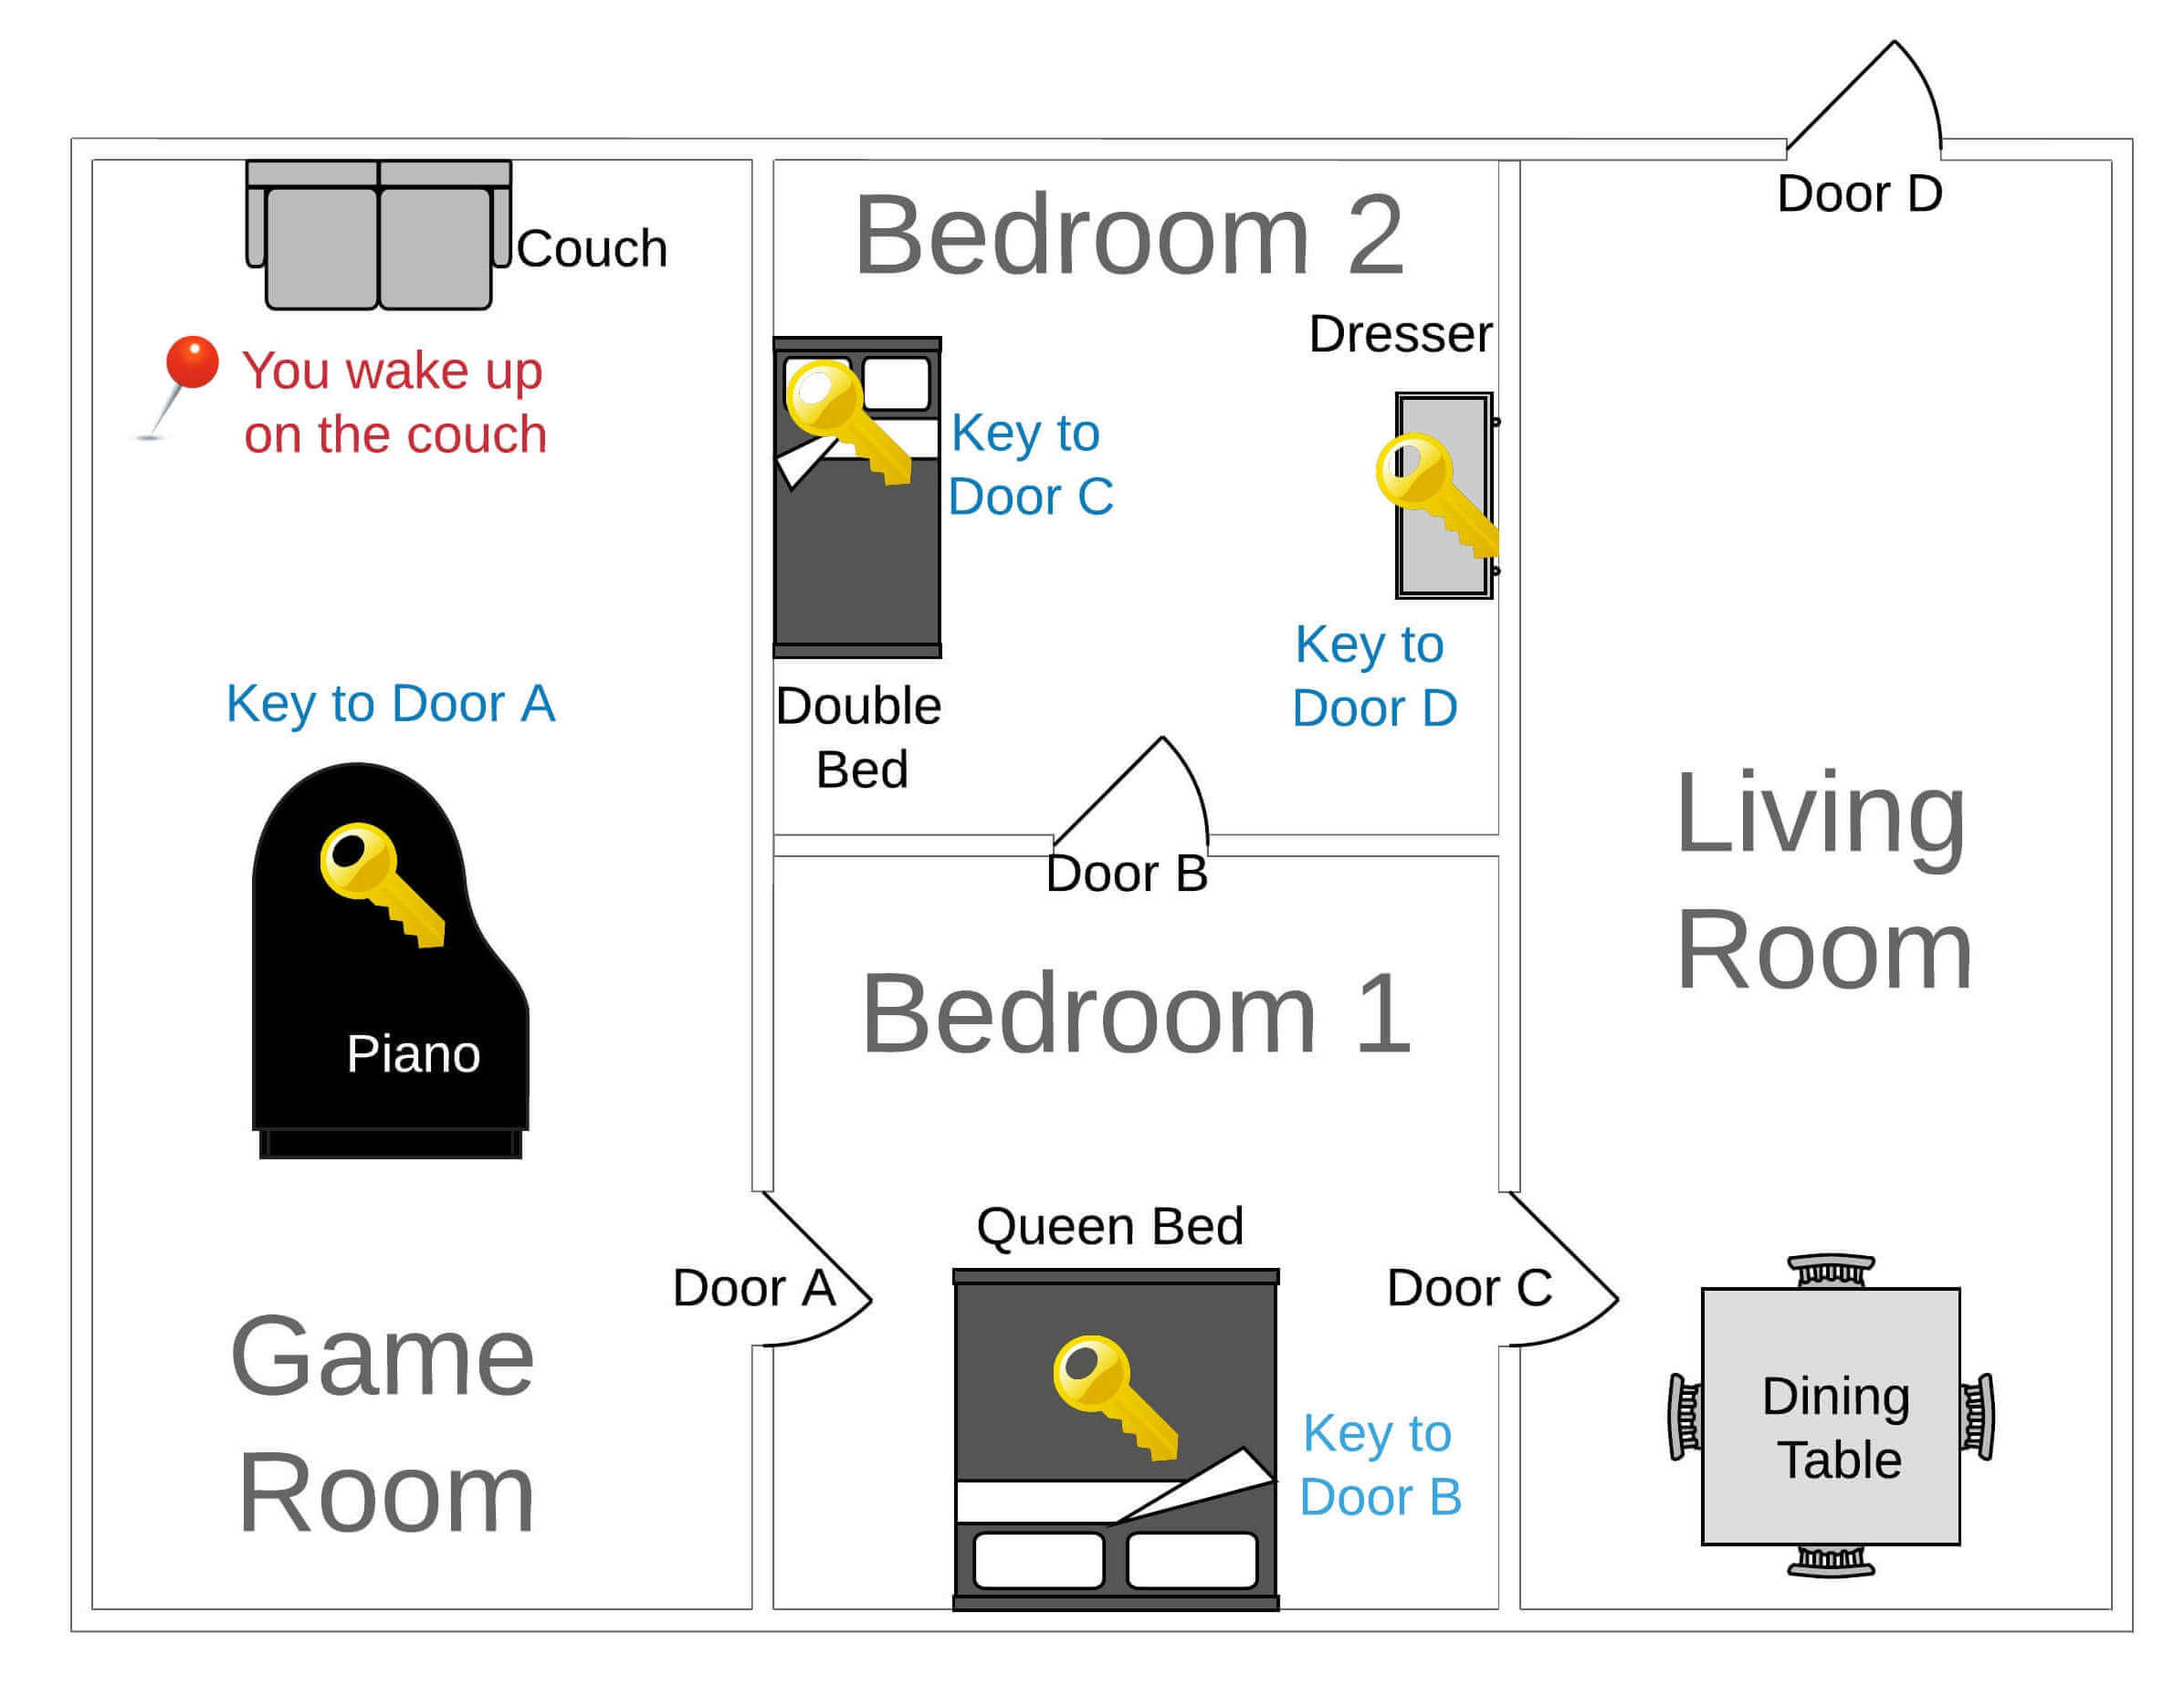

In [1]:
from IPython.display import Image
Image(filename='escape-room-plan.jpg') 

In [2]:
# define rooms and items

door_a = {
    "name": "door a",
    "type": "door",
}

door_b = { 
    "name": "door b",
    "type": "door",
}

door_c = { 
    "name": "door c",
    "type": "door",
}

door_d = { 
    "name": "door d",
    "type": "door",
}

key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
}

key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
}

key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
}

key_d = {
    "name": "key for door d",
    "type": "key",
    "target": door_d,
}


bedroom_1 = {
    "name": "bedroom 1",
    "type": "room",
}

bedroom_2 = {
    "name": "bedroom 2",
    "type": "room",
}


living_room = {
    "name": "living_room",
    "type": "room",
}

game_room = {
    "name": "game room",
    "type": "room",
}

exit_room = {
    "name": "Freedom room",
    "type": "room",
}


queen_bed = {
    "name": "queen_bed",
    "type": "furniture",
}

couch = {
    "name": "couch",
    "type": "furniture", 
}

piano = {
    "name": "piano",
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

double_bed = {
    "name": "double bed",
    "type": "furniture",
}

dinning_table = {
    "name": "dinning table",
    "type": "furniture",
}

# variables according to each room 

all_rooms = [game_room, bedroom_1]

all_doors = [door_a]

# define which items/rooms are related

object_relations = {
    "game room": [couch, piano, door_a],
    "piano": [key_a],
    "bedroom_1": [door_a],
    "door a": [game_room, bedroom_1]
}

# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": game_room
}


In [3]:
def linebreak():
    print("\n\n")

def start_game():
    print("You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!")
    play_room(game_state["current_room"])

def play_room(room):
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        print("Congrats! You escaped this room! Advance for the next one")
        from IPython.display import Image
        Image(filename='gip.gif') 
    else:
        print("You are now in " + room["name"])
        intended_action = input("What would you like to do? Type 'e' for explore or 'x' for examine?").strip()
        if intended_action == "e":
            explore_room(room)
            play_room(room)
        elif intended_action == "x":
            examine_item(input("What would you like to examine?").strip())
        else:
            print("Not sure what you mean. Python can´t read gibberish. Please type 'e' for explore or 'x' for examine.")
            play_room(room)
        linebreak()

def explore_room(room):
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    current_room = game_state["current_room"]
    next_room = ""
    output = None
    
    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it. Keep searching or you will perish."
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")
    
    if(next_room and input("Do you want to go to the next room? Enter 'y' for yes or 'n' for no").strip() == 'y'):
        play_room(next_room)
    else:
        play_room(current_room)

In [4]:
game_state = INIT_GAME_STATE.copy()

start_game()

You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!
Congrats! You escaped this room! Advance for the next one


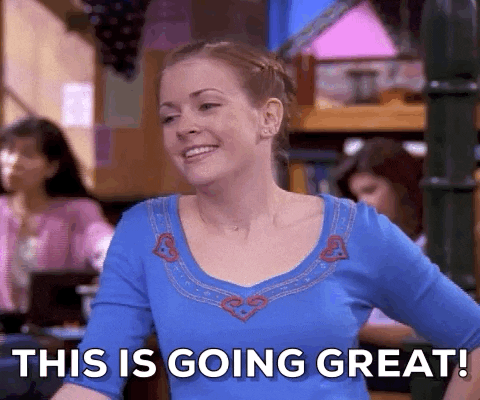

In [5]:
    from IPython.display import Image
    Image(filename='gip.gif') 

In [6]:
# bedroom 1 
all_rooms = [bedroom_1, living_room, game_room]

all_doors = [door_a, door_b, door_c ]

# define which items/rooms are related

object_relations = {
    "bedroom 1": [queen_bed, door_b, door_c],
    "queen_bed": [key_b],
    "door b": [bedroom_1, bedroom_2]
}

INIT_GAME_STATE = {
    "current_room": bedroom_1,
    "keys_collected": [],
    "target_room": bedroom_1
}


In [7]:
game_state = INIT_GAME_STATE.copy()

play_room(bedroom_1)

Congrats! You escaped this room! Advance for the next one


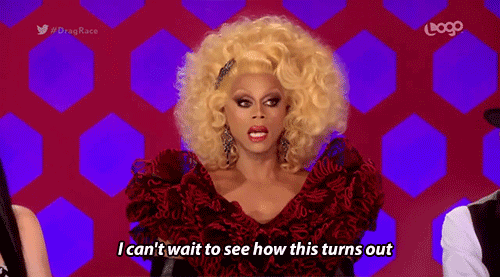

In [8]:
    from IPython.display import Image
    Image(filename='RP.gif')

In [9]:
# bedroom 2 
all_rooms = [bedroom_1, living_room, bedroom_1]

all_doors = [door_b ]

# define which items/rooms are related

object_relations = {
    "bedroom 2": [double_bed, door_b, dresser],
    "double_bed": [key_c],
    "dresser": [key_d],
    "door b": [bedroom_2, bedroom_1 ]
}

INIT_GAME_STATE = {
    "current_room": bedroom_2,
    "keys_collected": [key_b],
    "target_room": bedroom_1
}

In [ ]:
# bedroom 2 
all_rooms = [bedroom_1, living_room, bedroom_1]

all_doors = [door_b ]

# define which items/rooms are related

object_relations = {
    "bedroom 2": [double_bed, door_b, dresser],
    "double_bed": [key_c],
    "dresser": [key_d],
    "door b": [bedroom_2, bedroom_1 ]
}

INIT_GAME_STATE = {
    "current_room": bedroom_2,
    "keys_collected": [key_b],
    "target_room": bedroom_1
}

In [ ]:
game_state = INIT_GAME_STATE.copy()

play_room(bedroom_2)

You are now in bedroom 2
What would you like to do? Type 'e' for explore or 'x' for examine?e
You explore the room. This is bedroom 2. You find double bed, door b, dresser
You are now in bedroom 2
What would you like to do? Type 'e' for explore or 'x' for examine?x
What would you like to examine?dresser
You examine dresser. You find key for door d.
You are now in bedroom 2
What would you like to do? Type 'e' for explore or 'x' for examine?e
You explore the room. This is bedroom 2. You find double bed, door b, dresser
You are now in bedroom 2
What would you like to do? Type 'e' for explore or 'x' for examine?x
What would you like to examine?door b
You examine door b. It is locked but you don't have the key.
You are now in bedroom 2
